In [20]:
import os
import numpy as np

# Define paths and gesture labels
data_dir = 'data'
gesture_classes = ['no_gesture', 'swipe', 'button_Press']
label_map = {gesture: idx for idx, gesture in enumerate(gesture_classes)}

X = []
y = []

# Load data
for gesture in gesture_classes:
    gesture_path = os.path.join(data_dir, gesture)
    for file in os.listdir(gesture_path):
        if file.endswith('.npy'):
            sample = np.load(os.path.join(gesture_path, file))
            X.append(sample)
            y.append(label_map[gesture])

X = np.array(X)
y = np.array(y)
print(f"Loaded {len(X)} samples. Shape: {X.shape}")


Loaded 600 samples. Shape: (600, 49600)


In [ ]:
import matplotlib.pyplot as plt

# Visualize the first sample
plt.figure(figsize=(10, 5))
plt.plot(X[0])
plt.yscale('log')
plt.title(f"Sample from class: {gesture_classes[y[0]]}")
# Visualize the first sample
plt.figure(figsize=(10, 5))
plt.plot(X[201])
plt.yscale('log')
plt.title(f"Sample from class: {gesture_classes[y[201]]}")
# Visualize the first sample
plt.figure(figsize=(10, 5))
plt.plot(X[400])
plt.yscale('log')
plt.title(f"Sample from class: {gesture_classes[y[400]]}")

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42)


### Option 1: 1D CNN

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

X_train_cnn = X_train.reshape(-1, 49600, 1)
X_test_cnn = X_test.reshape(-1, 49600, 1)


model = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(49600, 1)),
    MaxPooling1D(pool_size=4),
    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 gesture classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=5, batch_size=16, validation_split=0.2)


c:\Pyth\radarobj_detection\radarml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 448ms/step - accuracy: 0.6729 - loss: 2.1440 - val_accuracy: 0.9271 - val_loss: 0.4190
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step - accuracy: 0.9269 - loss: 0.2584 - val_accuracy: 0.9271 - val_loss: 0.2804
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.9682 - loss: 0.0983 - val_accuracy: 0.9062 - val_loss: 0.2904
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 420ms/step - accuracy: 0.9931 - loss: 0.0308 - val_accuracy: 0.9792 - val_loss: 0.2975
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 414ms/step - accuracy: 0.9982 - loss: 0.0229 - val_accuracy: 0.9479 - val_loss: 0.4484


In [6]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9477 - loss: 0.3699
Test Loss: 0.2578
Test Accuracy: 0.9500


In [7]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test_cnn)
y_pred_classes = y_pred.argmax(axis=1)  # convert from probabilities to class indices

# Print report
print(classification_report(y_test, y_pred_classes, target_names=['no_gesture', 'swipe', 'button_Press']))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
              precision    recall  f1-score   support

  no_gesture       0.87      1.00      0.93        40
       swipe       1.00      0.90      0.95        40
button_Press       1.00      0.95      0.97        40

    accuracy                           0.95       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.95      0.95       120



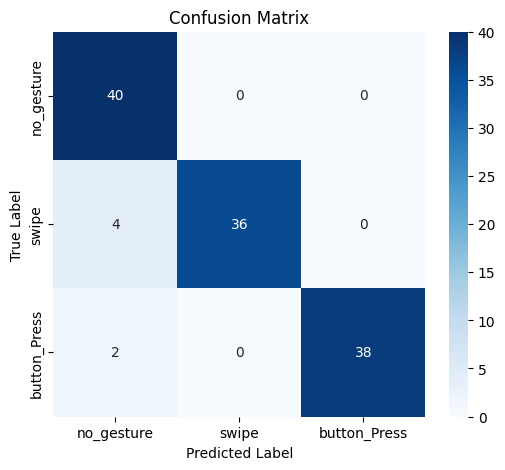

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['no_gesture', 'swipe', 'button_Press'],
            yticklabels=['no_gesture', 'swipe', 'button_Press'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()


### Option 2: Neural Network

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(1, activation='relu', input_shape=(10,), name="hidden"),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3701 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3620 - loss: 1.0985 - val_accuracy: 0.3125 - val_loss: 1.0987
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3275 - loss: 1.0988 - val_accuracy: 0.3125 - val_loss: 1.0987
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3531 - loss: 1.0985 - val_accuracy: 0.3125 - val_loss: 1.0989
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3364 - loss: 1.0986 - val_accuracy: 0.3125 - val_loss: 1.0989
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3575 - loss: 1.0984 - val_accuracy: 0.3125 - val_loss: 1.0990
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3385 - loss: 1.0986 - val_accuracy: 0.3125 - val_loss: 1.0990
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3466 - loss: 1.0984 - val_accuracy: 0.3125 -

In [26]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3427 - loss: 1.0982 
Test Loss: 1.0982
Test Accuracy: 0.3333


In [27]:
from sklearn.metrics import classification_report

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # convert from probabilities to class indices

# Print report
print(classification_report(y_test, y_pred_classes, target_names=['no_gesture', 'swipe', 'button_Press']))


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BEDB9732E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
              precision    recall  f1-score   support

  no_gesture       0.00      0.00      0.00        40
       swipe       0.33      1.00      0.50        40
button_Press       0.00      0.00  

c:\Pyth\radarobj_detection\radarml\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Pyth\radarobj_detection\radarml\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Pyth\radarobj_detection\radarml\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

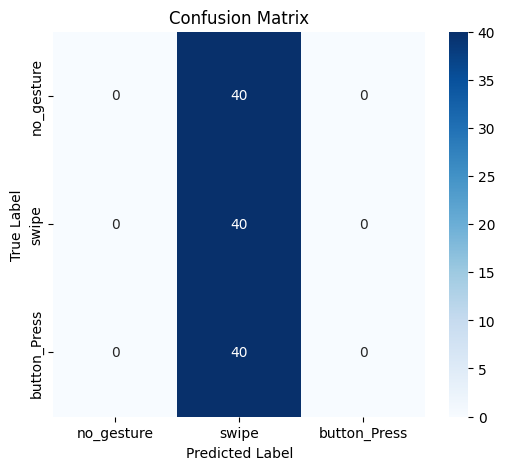

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['no_gesture', 'swipe', 'button_Press'],
            yticklabels=['no_gesture', 'swipe', 'button_Press'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()


In [29]:
model.weights

[<Variable path=sequential_3/hidden/kernel, shape=(10, 1), dtype=float32, value=[[ 1.6536797 ]
  [-0.7066779 ]
  [-0.72189325]
  [-0.4467177 ]
  [ 0.54447573]
  [-1.0301678 ]
  [ 0.83878976]
  [-1.1322219 ]
  [ 0.850419  ]
  [ 0.40999615]]>,
 <Variable path=sequential_3/hidden/bias, shape=(1,), dtype=float32, value=[0.00819295]>,
 <Variable path=sequential_3/dense_4/kernel, shape=(1, 3), dtype=float32, value=[[-0.14927155  1.2209483  -0.50930077]]>,
 <Variable path=sequential_3/dense_4/bias, shape=(3,), dtype=float32, value=[ 0.00381417  0.00373467 -0.00775871]>]